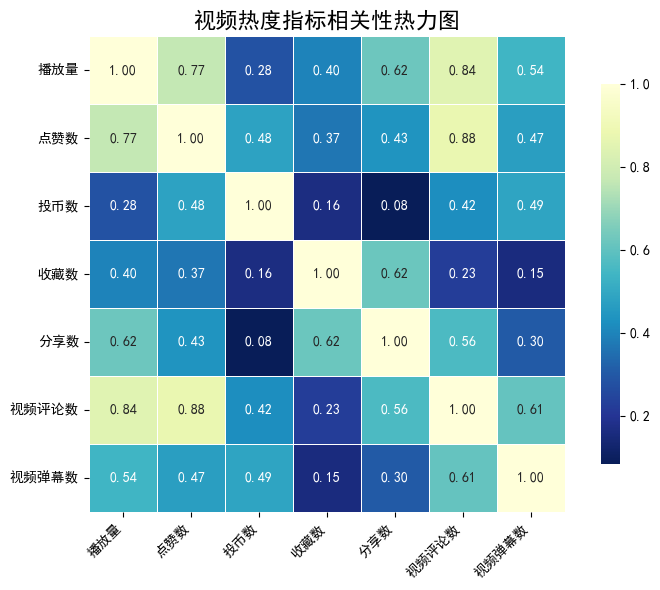

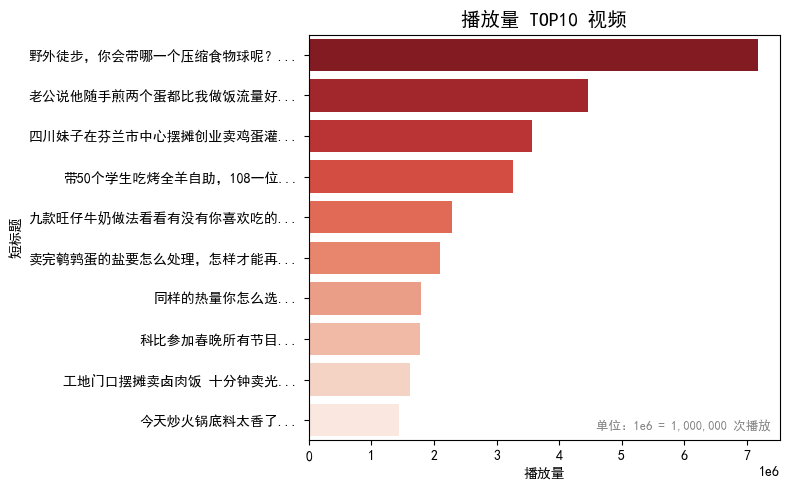

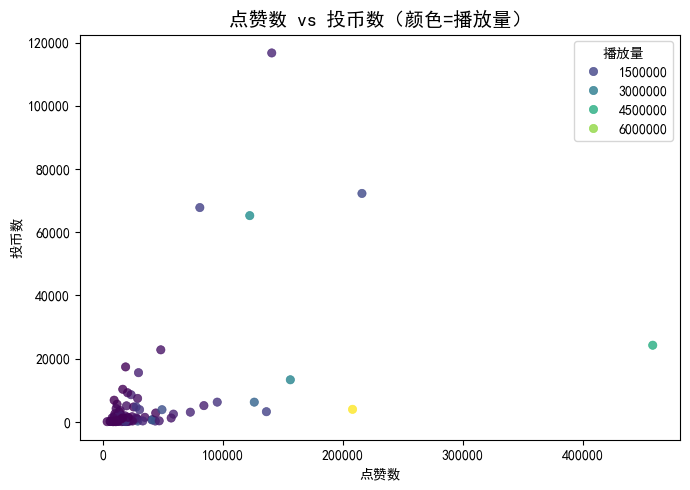

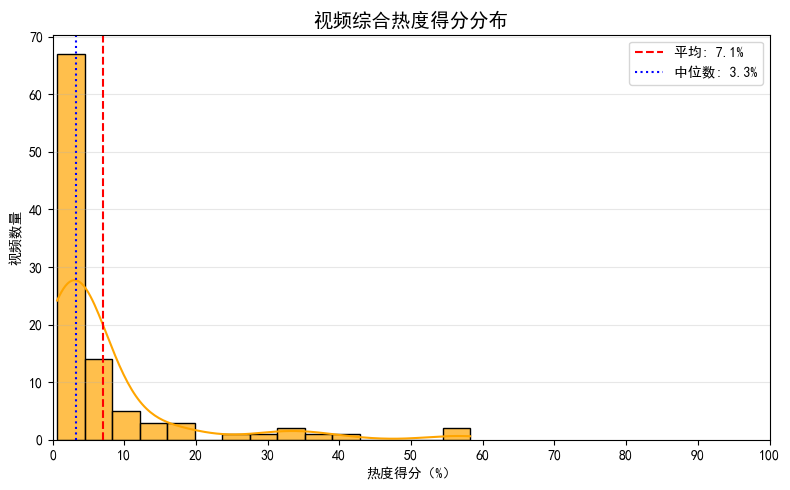

热度得分统计：
平均值: 7.05%
中位数: 3.27%
最小值: 0.63%
最大值: 58.24%
标准差: 10.68


In [18]:
# b站美食榜123问可视化
#Q1:B站视频热度维度分析：播放量、点赞、投币、收藏、分享、评论、弹幕 
"""
B站美食视频
运行环境：Python 3.9+  |  pip install pandas seaborn matplotlib scikit-learn
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import platform
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# ---------- 1. 自动适配系统中文 ----------
def set_chinese_font():
    sys = platform.system()
    font_candidates = {
        'Windows': ['SimHei', 'Microsoft YaHei', '微软雅黑'],
        'Darwin':  ['PingFang SC', 'Heiti SC'],
        'Linux':   ['Noto Sans CJK SC', 'WenQuanYi Micro Hei']
    }
    for font in font_candidates.get(sys, []):
        try:
            rcParams['font.family'] = font
            break
        except:
            continue
    rcParams['axes.unicode_minus'] = False   # 正常显示负号
set_chinese_font()

# ---------- 2. 读数据 ----------
df = pd.read_csv('bilibili_food_cleaned_final.csv')

# ---------- 3. 选取热度字段 ----------
hot_cols = ['播放量', '点赞数', '投币数', '收藏数', '分享数', '视频评论数', '视频弹幕数']

# ---------- 4. 相关性热力图 ----------
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(
    df[hot_cols].corr(),
    annot=True,
    cmap='YlGnBu_r',       # 🔥 反转颜色映射：深色 = 高相关
    fmt='.2f',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)
plt.title('视频热度指标相关性热力图', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('1_热度相关性热力图_优化版.png', dpi=300)
plt.show()


# ---------- 5. 播放量 TOP10 条形图 ----------
top10 = df.nlargest(10, '播放量')[['视频标题', '播放量']].copy()
top10['短标题'] = top10['视频标题'].str.slice(0, 18) + '...'

plt.figure(figsize=(8, 5))
sns.barplot(y='短标题', x='播放量', data=top10, palette='Reds_r')
plt.title('播放量 TOP10 视频', fontsize=14)
plt.xlabel('播放量')

#  添加单位说明：1e6
plt.text(
    0.98, 0.02,               # 右下角（相对坐标）
    '单位：1e6 = 1,000,000 次播放',
    ha='right', va='bottom',
    transform=plt.gca().transAxes,  # 使用轴坐标系
    fontsize=9,
    color='gray',
    style='italic'
)

plt.tight_layout()
plt.savefig('2_播放量TOP10.png', dpi=300)
plt.show()


# ---------- 6. 点赞-投币 散点图（颜色=播放量） ----------
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='点赞数', y='投币数', hue='播放量',
                palette='viridis', alpha=0.8, edgecolor=None)
plt.title('点赞数 vs 投币数（颜色=播放量）', fontsize=14)
plt.tight_layout()
plt.savefig('3_点赞投币散点图.png', dpi=300)
plt.show()

# ---------- 7. 热度得分分布（百分版+中文） ----------
from sklearn.preprocessing import MinMaxScaler

# 重新计算热度得分
hot_cols = ['播放量', '点赞数', '投币数', '收藏数', '分享数', '视频评论数', '视频弹幕数']
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[hot_cols]), columns=hot_cols)

w = {'播放量': 0.3, '点赞数': 0.3, '投币数': 0.2, '收藏数': 0.1,
     '分享数': 0.05, '视频评论数': 0.025, '视频弹幕数': 0.025}

df['热度得分'] = (df_scaled * pd.Series(w)).sum(axis=1)
df['热度得分百分'] = df['热度得分'] * 100  # 0-100%

# 创建图形
plt.figure(figsize=(8, 5))

# 绘制直方图
sns.histplot(df['热度得分百分'], bins=15, kde=True, color='orange', alpha=0.7)

# 设置x轴范围（去掉孤0）
plt.xlim(1, None)

# 设置刻度
plt.xticks(range(0, 101, 10))

# 设置中文标签
plt.title('视频综合热度得分分布', fontsize=14, fontweight='bold')
plt.xlabel('热度得分（%）')
plt.ylabel('视频数量')

# 设置纵轴格式为整数
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# 添加网格
plt.grid(True, alpha=0.3, axis='y')

# 添加统计信息
mean_score = df['热度得分百分'].mean()
median_score = df['热度得分百分'].median()
plt.axvline(x=mean_score, color='red', linestyle='--', linewidth=1.5, 
            label=f'平均: {mean_score:.1f}%')
plt.axvline(x=median_score, color='blue', linestyle=':', linewidth=1.5, 
            label=f'中位数: {median_score:.1f}%')

plt.legend()
plt.tight_layout()
plt.savefig('1_热度得分分布百分.png', dpi=300)
plt.show()

# 打印统计信息
print(f"热度得分统计：")
print(f"平均值: {mean_score:.2f}%")
print(f"中位数: {median_score:.2f}%")
print(f"最小值: {df['热度得分百分'].min():.2f}%")
print(f"最大值: {df['热度得分百分'].max():.2f}%")
print(f"标准差: {df['热度得分百分'].std():.2f}")






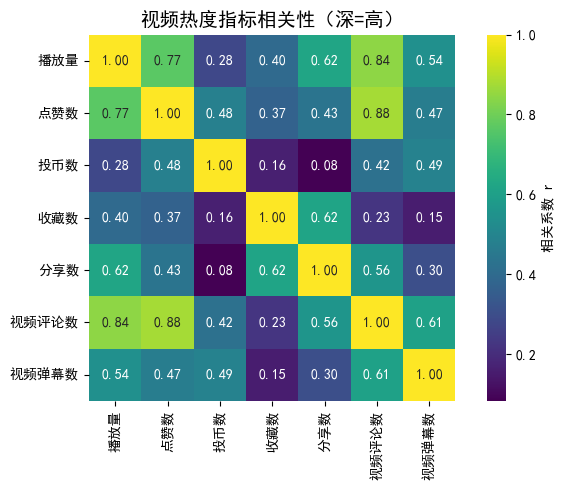

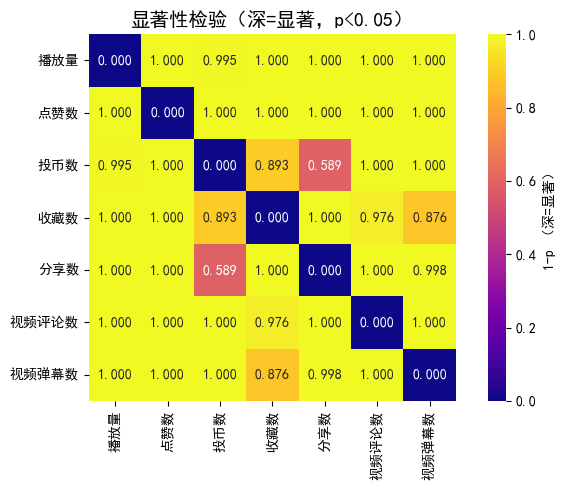

>>> 显著相关组合（p < 0.05）<<<
播放量 ↔ 点赞数  r=0.767  p=0.0000
播放量 ↔ 投币数  r=0.282  p=0.0045
播放量 ↔ 收藏数  r=0.397  p=0.0000
播放量 ↔ 分享数  r=0.621  p=0.0000
播放量 ↔ 视频评论数  r=0.844  p=0.0000
播放量 ↔ 视频弹幕数  r=0.541  p=0.0000
点赞数 ↔ 播放量  r=0.767  p=0.0000
点赞数 ↔ 投币数  r=0.480  p=0.0000
点赞数 ↔ 收藏数  r=0.367  p=0.0002
点赞数 ↔ 分享数  r=0.435  p=0.0000
点赞数 ↔ 视频评论数  r=0.877  p=0.0000
点赞数 ↔ 视频弹幕数  r=0.469  p=0.0000
投币数 ↔ 播放量  r=0.282  p=0.0045
投币数 ↔ 点赞数  r=0.480  p=0.0000
投币数 ↔ 视频评论数  r=0.423  p=0.0000
投币数 ↔ 视频弹幕数  r=0.486  p=0.0000
收藏数 ↔ 播放量  r=0.397  p=0.0000
收藏数 ↔ 点赞数  r=0.367  p=0.0002
收藏数 ↔ 分享数  r=0.620  p=0.0000
收藏数 ↔ 视频评论数  r=0.225  p=0.0243
分享数 ↔ 播放量  r=0.621  p=0.0000
分享数 ↔ 点赞数  r=0.435  p=0.0000
分享数 ↔ 收藏数  r=0.620  p=0.0000
分享数 ↔ 视频评论数  r=0.562  p=0.0000
分享数 ↔ 视频弹幕数  r=0.304  p=0.0021
视频评论数 ↔ 播放量  r=0.844  p=0.0000
视频评论数 ↔ 点赞数  r=0.877  p=0.0000
视频评论数 ↔ 投币数  r=0.423  p=0.0000
视频评论数 ↔ 收藏数  r=0.225  p=0.0243
视频评论数 ↔ 分享数  r=0.562  p=0.0000
视频评论数 ↔ 视频弹幕数  r=0.609  p=0.0000
视频弹幕数 ↔ 播放量  r=0.541  p=0.0000
视频弹幕数 ↔ 点赞数  r

In [20]:
# -*- coding: utf-8 -*-
"""
相关性 + 显著性 双热力图
pip install pandas seaborn matplotlib scipy
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import platform
from scipy.stats import pearsonr
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ---------- 中文画笔 ----------
def set_chinese_font():
    sys = platform.system()
    fonts = {'Windows': ['SimHei', 'Microsoft YaHei'],
             'Darwin': ['PingFang SC', 'Heiti SC'],
             'Linux': ['Noto Sans CJK SC', 'WenQuanYi Micro Hei']}
    for f in fonts.get(sys, []):
        try:
            rcParams['font.family'] = f
            break
        except:
            continue
    rcParams['axes.unicode_minus'] = False
set_chinese_font()

# ---------- 读数据 ----------
df = pd.read_csv('bilibili_food_cleaned_final.csv')
hot_cols = ['播放量', '点赞数', '投币数', '收藏数', '分享数', '视频评论数', '视频弹幕数']
data = df[hot_cols]

# ---------- ① 相关性矩阵 ----------
corr = data.corr()

# ---------- ② 显著性矩阵（p 值） ----------
pval = pd.DataFrame(np.ones(corr.shape), index=corr.index, columns=corr.columns)
for i in range(len(hot_cols)):
    for j in range(len(hot_cols)):
        if i != j:
            _, p = pearsonr(data.iloc[:, i], data.iloc[:, j])
            pval.iloc[i, j] = p

# ---------- ③ 相关性热力图（深=高） ----------
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', square=True,
            cbar_kws={'label': '相关系数 r'})
plt.title('视频热度指标相关性（深=高）', fontsize=14)
plt.tight_layout()
plt.savefig('1_相关性_深=高.png', dpi=300)
plt.show()

# ---------- ④ 显著性热力图（深=显著） ----------
plt.figure(figsize=(7, 5))
# 用 1-p 做颜色：越深 → p 越小 → 越显著
sns.heatmap(1 - pval, annot=True, cmap='plasma', fmt='.3f', square=True,
            cbar_kws={'label': '1-p （深=显著）'})
plt.title('显著性检验（深=显著，p<0.05）', fontsize=14)
plt.tight_layout()
plt.savefig('2_显著性_深=显著.png', dpi=300)
plt.show()

# ---------- ⑤ 控制台打印「显著组合」 ----------
sig_pairs = pval.stack()[pval.stack() < 0.05].index.tolist()
print('>>> 显著相关组合（p < 0.05）<<<')
for (x, y) in sig_pairs:
    if x != y:   # 跳过自己 vs 自己
        print(f'{x} ↔ {y}  r={corr.loc[x, y]:.3f}  p={pval.loc[x, y]:.4f}')


In [10]:
pip install pandas seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


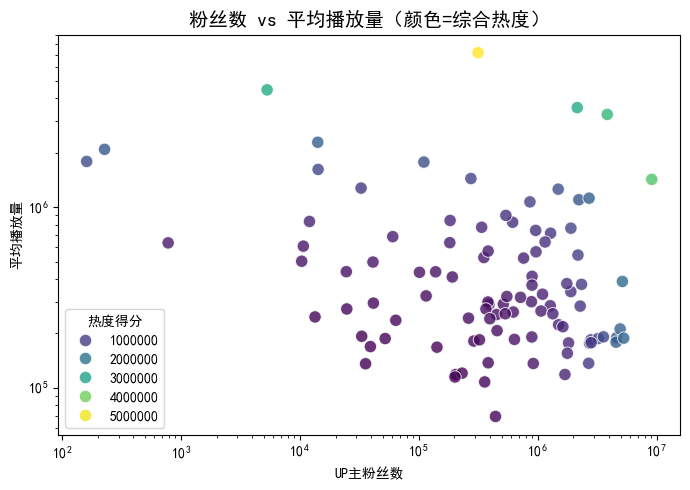

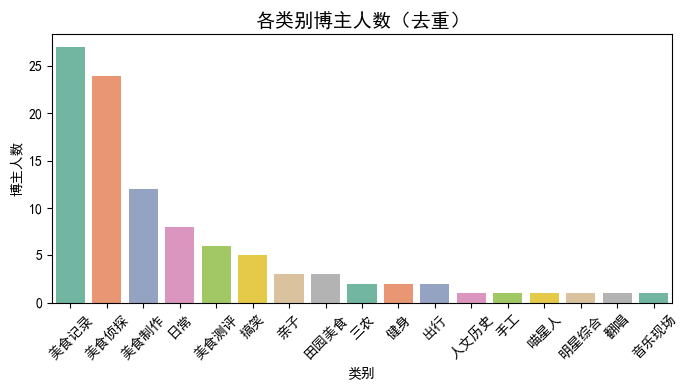

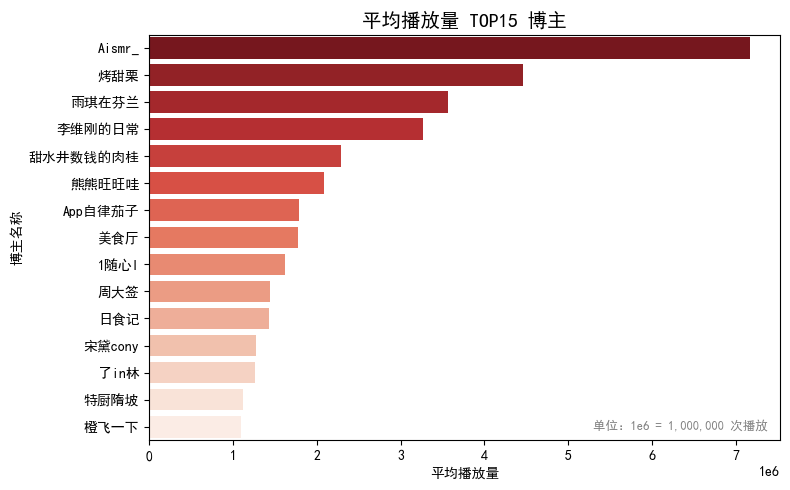

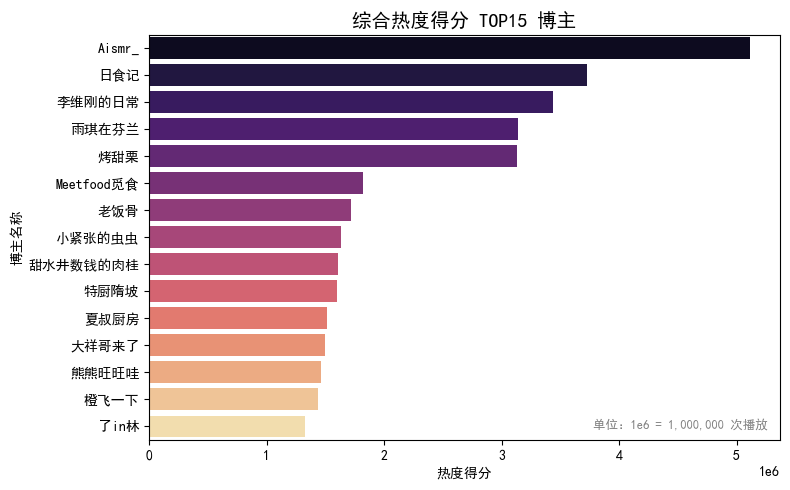


>>> 黑马博主榜单（粉丝<50万 但 平均播放>50万）<<<
1随心I  |  粉丝14,278  |  平均播放1618983
Aismr_  |  粉丝315,813  |  平均播放7170333
App自律茄子  |  粉丝162  |  平均播放1792559
周大签  |  粉丝274,791  |  平均播放1441594
宋黛cony  |  粉丝32,803  |  平均播放1276273
小豪饿了-  |  粉丝12,083  |  平均播放834199
小食光光  |  粉丝182,633  |  平均播放636376
慧慧饱饱呀  |  粉丝353,112  |  平均播放526385
我写昵称写个蛋  |  粉丝784  |  平均播放634943
星河对长  |  粉丝183,730  |  平均播放844476
烤甜栗  |  粉丝5,322  |  平均播放4466505
熊熊旺旺哇  |  粉丝229  |  平均播放2091954
甜水井数钱的肉桂  |  粉丝14,174  |  平均播放2289758
神奇张之助  |  粉丝10,726  |  平均播放608721
美食分享老邓  |  粉丝60,534  |  平均播放687330
美食厅  |  粉丝110,567  |  平均播放1778499
葛师傅海鲜烧烤售配方  |  粉丝10,390  |  平均播放502293
蔡蔡的vlog  |  粉丝338,386  |  平均播放774431
野文不懂吃  |  粉丝383,530  |  平均播放571742


In [15]:
#Q2:b站博主维度分析
"""
B站美食 - 博主影响力维度分析（粉丝数；播放量；发布量）
运行环境：Python 3.9+  |  pip install pandas seaborn matplotlib
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import platform
import warnings
warnings.filterwarnings('ignore')

# ---------- 1. 中文画笔 ----------
def set_chinese_font():
    sys = platform.system()
    fonts = {'Windows': ['SimHei', 'Microsoft YaHei'],
             'Darwin': ['PingFang SC', 'Heiti SC'],
             'Linux': ['Noto Sans CJK SC', 'WenQuanYi Micro Hei']}
    for f in fonts.get(sys, []):
        try:
            rcParams['font.family'] = f
            break
        except:
            continue
    rcParams['axes.unicode_minus'] = False
set_chinese_font()

# ---------- 2. 读数据 ----------
df = pd.read_csv('bilibili_food_cleaned_final.csv')

# ---------- 3. 构造博主级别指标 ----------
# 计算每位博主的：粉丝数、平均播放量、发布频率（条/天）
influence = (df.groupby(['博主名称', 'UP主粉丝数'])
             .agg(平均播放量=('播放量', 'mean'),
                  发布次数=('发布时间', 'count'))
             .reset_index())
influence['发布频率'] = influence['发布次数'] / 7        # 7 天数据
influence['热度得分'] = (influence['平均播放量'] * 0.7 +
                         influence['UP主粉丝数'] * 0.3)

# ---------- 4. 图1：粉丝数 vs 平均播放量 ----------
plt.figure(figsize=(7, 5))
sns.scatterplot(data=influence, x='UP主粉丝数', y='平均播放量', hue='热度得分',
                palette='viridis', alpha=0.8, s=80)
plt.xscale('log')
plt.yscale('log')
plt.title('粉丝数 vs 平均播放量（颜色=综合热度）', fontsize=14)
plt.tight_layout()
plt.savefig('1_粉丝vs播放量.png', dpi=300)
plt.show()

# ---------- 5. 图2：各类别博主人数分布 ----------
category_author_cnt = df.groupby('类别')['博主名称'].nunique().sort_values(ascending=False)

plt.figure(figsize=(7, 4))
sns.barplot(x=category_author_cnt.index, y=category_author_cnt.values, palette='Set2')
plt.title('各类别博主人数（去重）', fontsize=14)
plt.xlabel('类别')
plt.ylabel('博主人数')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('2_类别博主人数分布.png', dpi=300)
plt.show()



# ---------- 6. 图3：TOP15 平均播放量 ----------
top15 = influence.nlargest(15, '平均播放量')
plt.figure(figsize=(8, 5))
sns.barplot(y='博主名称', x='平均播放量', data=top15, palette='Reds_r')
plt.title('平均播放量 TOP15 博主', fontsize=14)
#  添加单位说明 1e6
plt.text(
    0.98, 0.02,               # 右下角（相对坐标）
    '单位：1e6 = 1,000,000 次播放',
    ha='right', va='bottom',
    transform=plt.gca().transAxes,  # 使用轴坐标系
    fontsize=9,
    color='gray',
    style='italic'
)

plt.tight_layout()
plt.savefig('3_平均播放量TOP15.png', dpi=300)
plt.show()

# ---------- 7. 图4：TOP15 热度得分 ----------
top15_score = influence.nlargest(15, '热度得分')
plt.figure(figsize=(8, 5))
sns.barplot(y='博主名称', x='热度得分', data=top15_score, palette='magma')
plt.title('综合热度得分 TOP15 博主', fontsize=14)
#  添加单位说明 1e6
plt.text(
    0.98, 0.02,               # 右下角（相对坐标）
    '单位：1e6 = 1,000,000 次播放',
    ha='right', va='bottom',
    transform=plt.gca().transAxes,  # 使用轴坐标系
    fontsize=9,
    color='gray',
    style='italic'
)
plt.tight_layout()
plt.savefig('4_热度得分TOP15.png', dpi=300)
plt.show()

# ---------- 8. 黑马榜单 ----------
# 低粉丝（<50 万）但平均播放量 >50 万
hei_ma = influence[(influence['UP主粉丝数'] < 500000) &
                   (influence['平均播放量'] > 500000)]
print('\n>>> 黑马博主榜单（粉丝<50万 但 平均播放>50万）<<<')
if not hei_ma.empty:
    for _, row in hei_ma.iterrows():
        print(f"{row['博主名称']}  |  粉丝{row['UP主粉丝数']:,}  |  平均播放{row['平均播放量']:.0f}")
else:
    print('本次数据暂无符合标准的“黑马”博主。')



In [5]:
print("发布次数的唯一值：", influence['发布次数'].unique())
print("发布次数的值计数：")
print(influence['发布次数'].value_counts().sort_index())

发布次数的唯一值： [1]
发布次数的值计数：
发布次数
1    100
Name: count, dtype: int64


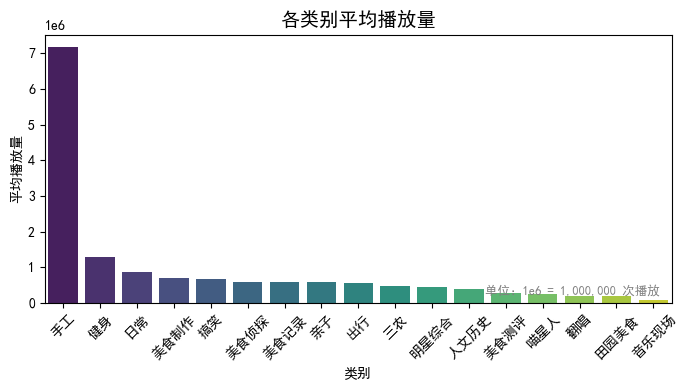

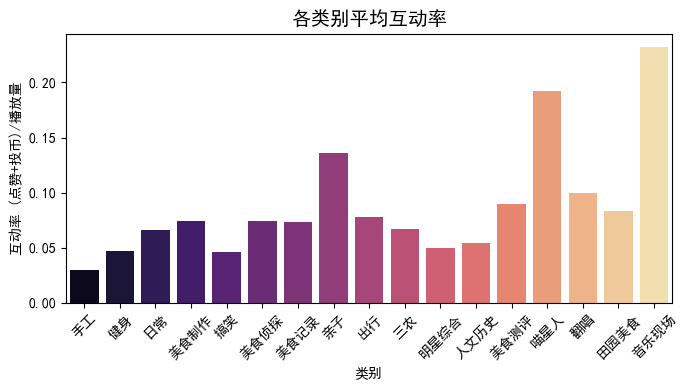

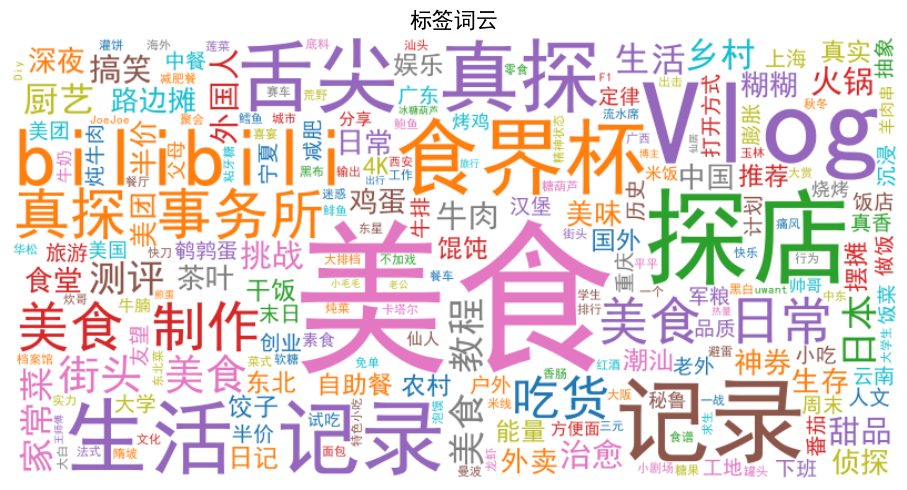

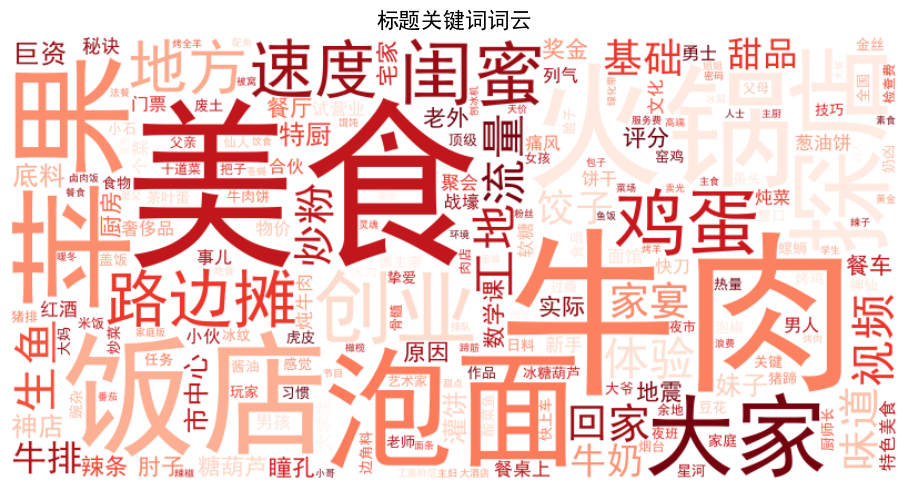


>>> TOP10 高频标签 <<<
美食           110
记录           35
Vlog         23
生活           23
探店           22
日常           18
bilibili     17
食界杯          17
舌尖           16
真探           16


In [28]:
# Q3:B站内容维度分析：类别，标签，标题
"""
B站美食 - 内容类型维度分析
一键出图：类别热度+标签词云+标题词云
运行环境：Python 3.9+  |  pip install pandas seaborn matplotlib wordcloud jieba
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import platform
import jieba
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import os          
warnings.filterwarnings('ignore')


# ---------- 1. 中文画笔 ----------
def set_chinese_font():
    sys = platform.system()
    fonts = {'Windows': ['SimHei', 'Microsoft YaHei'],
             'Darwin': ['PingFang SC', 'Heiti SC'],
             'Linux': ['Noto Sans CJK SC', 'WenQuanYi Micro Hei']}
    for f in fonts.get(sys, []):
        try:
            rcParams['font.family'] = f
            break
        except:
            continue
    rcParams['axes.unicode_minus'] = False
set_chinese_font()

# ---------- 2. 读数据 ----------
df = pd.read_csv('bilibili_food_cleaned_final.csv')

# ---------- 3. 类别播放量 & 互动率 ----------
df['互动率'] = (df['点赞数'] + df['投币数']) / df['播放量']
category_stat = (df.groupby('类别')
                 .agg(播放量均值=('播放量', 'mean'),
                      互动率均值=('互动率', 'mean'),
                      视频条数=('类别', 'count'))
                 .sort_values('播放量均值', ascending=False))

# 图1：类别平均播放量
plt.figure(figsize=(7, 4))
sns.barplot(x=category_stat.index, y=category_stat['播放量均值'], palette='viridis')


plt.title('各类别平均播放量', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('平均播放量')

# ===== 单位标注（放在 show/save 之前） =====
plt.text(
    0.98, 0.02,               # 右下角（轴坐标系）
    '单位：1e6 = 1,000,000 次播放',
    ha='right', va='bottom',
    transform=plt.gca().transAxes,
    fontsize=9,
    color='gray',
    style='italic'
)

plt.tight_layout()
plt.savefig('1_类别播放量.png', dpi=300)
plt.show()          # ← 一定在最后一行



# 图2：类别平均互动率
plt.figure(figsize=(7, 4))
sns.barplot(x=category_stat.index, y=category_stat['互动率均值'], palette='magma')
plt.title('各类别平均互动率', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('互动率 (点赞+投币)/播放量')
plt.tight_layout()
plt.savefig('2_类别互动率.png', dpi=300)
plt.show()

# ---------- 4. 标签词云 ----------
import matplotlib
font = matplotlib.font_manager.findfont('SimHei')  # 自动找黑体
if not os.path.exists(font):                       # 找不到就手动指
    font = {'Windows':'C:/Windows/Fonts/simhei.ttf',
            'Darwin':'/System/Library/Fonts/PingFang.ttc',
            'Linux':'/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc'}.get(platform.system())
tag_text = ' '.join(df['标签'].dropna().str.replace(',', ' '))
words = [w for w in jieba.lcut(tag_text) if len(w) > 1]
wc = WordCloud(font_path=font, width=800, height=400,
               background_color='white', colormap='tab10').generate(' '.join(words))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('标签词云', fontsize=16)
plt.tight_layout()
plt.savefig('3_标签词云.png', dpi=300)
plt.show()


# ---------- 5. 标题关键词词云 ----------
import jieba.posseg as pseg
import matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
import platform

# 自动找系统黑体
font = matplotlib.font_manager.findfont('SimHei')
if not os.path.exists(font):
    font = {'Windows': 'C:/Windows/Fonts/simhei.ttf',
            'Darwin': '/System/Library/Fonts/PingFang.ttc',
            'Linux': '/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc'}.get(platform.system())

title_text = ' '.join(df['视频标题'].dropna())

junk = {'块钱', '小时', '分钟', '一天', '一个', '块', '元', '毛钱', '第', '天', '年', '月'}
title_words = [
    w for w, f in pseg.cut(title_text)
    if f == 'n' and len(w) > 1 and w not in junk
]


# ✅ 再生成词云
wc2 = WordCloud(font_path=font, width=800, height=400,
                background_color='white', colormap='Reds').generate(' '.join(title_words))

# ✅ 绘图
plt.figure(figsize=(10, 5))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.title('标题关键词词云', fontsize=16)
plt.tight_layout()
plt.savefig('4_标题词云.png', dpi=300)
plt.show()



# ---------- 6. 控制台打印 TOP10 标签 ----------
print('\n>>> TOP10 高频标签 <<<')
for word, cnt in Counter(words).most_common(10):
    print(f'{word:<12} {cnt}')
